<a href="https://colab.research.google.com/github/Anny8910/Decision-Tree-Classification-on-Diabetes-Dataset/blob/master/Diabetes_set_(Decision_tree).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
#import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot


In [14]:
# load dataset from github account
url = 'https://raw.githubusercontent.com/webshredder/CS7641-Assigment1/main/diabetes_dataset.csv'
df = pd.read_csv(url,on_bad_lines='skip')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
#feature variables
x=df.drop(['Outcome'], axis=1)
#target variable
y=df.Outcome

In [16]:
from sklearn.tree import DecisionTreeClassifier  # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix

Split: 0.05  Depth: 13  Nodes: 257  Train set accuracy: 1.0  Test set Accuracy: 0.6923076923076923
     Confusion Matrix: [array([0.53846154, 0.12820513]), array([0.17948718, 0.15384615])]
Split: 0.1  Depth: 15  Nodes: 245  Train set accuracy: 1.0  Test set Accuracy: 0.7142857142857143
     Confusion Matrix: [array([0.49350649, 0.12987013]), array([0.15584416, 0.22077922])]
Split: 0.15  Depth: 13  Nodes: 215  Train set accuracy: 1.0  Test set Accuracy: 0.6551724137931034
     Confusion Matrix: [array([0.46551724, 0.18103448]), array([0.1637931 , 0.18965517])]
Split: 0.2  Depth: 14  Nodes: 221  Train set accuracy: 1.0  Test set Accuracy: 0.6948051948051948
     Confusion Matrix: [array([0.5       , 0.14285714]), array([0.16233766, 0.19480519])]
Split: 0.3  Depth: 16  Nodes: 189  Train set accuracy: 1.0  Test set Accuracy: 0.6926406926406926
     Confusion Matrix: [array([0.51515152, 0.11688312]), array([0.19047619, 0.17748918])]
Split: 0.4  Depth: 12  Nodes: 169  Train set accuracy: 1.0

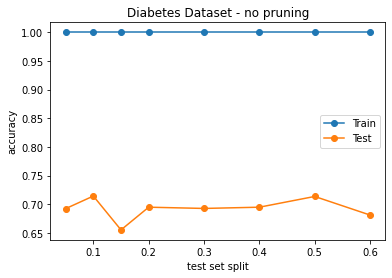

In [20]:
#decision tree classifer for no pruning vs splits
train_acc = []
test_acc = []
splits = [0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5, 0.6]
treenodes = []
treedepth = []

for i in range(len(splits)):
   x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=splits[i], random_state=1)
   # Create Decision Tree classifer object
   model = DecisionTreeClassifier(criterion='gini')

   # Train Decision Tree Classifer
   model = model.fit(x_train,y_train)
   #Predict the response for test dataset
   y_train_pred = model.predict(x_train)
   #Predict the response for test dataset
   y_test_pred = model.predict(x_test)

   train_acc.append(metrics.accuracy_score(y_train, y_train_pred))
   test_acc.append(metrics.accuracy_score(y_test, y_test_pred))
   treenodes.append(model.tree_.node_count)
   treedepth.append(model.tree_.max_depth)

   #print tree attributes
   print("Split:", splits[i], " Depth:",model.tree_.max_depth, " Nodes:",model.tree_.node_count, " Train set accuracy:", train_acc[i], " Test set Accuracy:",test_acc[i])

   #printConfusion matrix
   print("     Confusion Matrix:", list(confusion_matrix(y_test,y_test_pred)/len(y_test)))

#plot results
pyplot.plot(splits, train_acc , '-o', label='Train')
pyplot.plot(splits, test_acc, '-o', label='Test')
pyplot.title('Diabetes Dataset - no pruning')
pyplot.ylabel('accuracy')
pyplot.xlabel('test set split')
pyplot.legend()
pyplot.show()


Split: 0.05  Depth: 3  Nodes: 15  Train set accuracy: 0.7750342935528121  Test set Accuracy: 0.7948717948717948
     Confusion Matrix: [array([0.58974359, 0.07692308]), array([0.12820513, 0.20512821])]
Split: 0.1  Depth: 3  Nodes: 15  Train set accuracy: 0.7756874095513748  Test set Accuracy: 0.7792207792207793
     Confusion Matrix: [array([0.54545455, 0.07792208]), array([0.14285714, 0.23376623])]
Split: 0.15  Depth: 3  Nodes: 15  Train set accuracy: 0.7760736196319018  Test set Accuracy: 0.7758620689655172
     Confusion Matrix: [array([0.54310345, 0.10344828]), array([0.12068966, 0.23275862])]
Split: 0.2  Depth: 3  Nodes: 15  Train set accuracy: 0.7736156351791531  Test set Accuracy: 0.7857142857142857
     Confusion Matrix: [array([0.55194805, 0.09090909]), array([0.12337662, 0.23376623])]
Split: 0.3  Depth: 3  Nodes: 15  Train set accuracy: 0.7635009310986964  Test set Accuracy: 0.7575757575757576
     Confusion Matrix: [array([0.54978355, 0.08225108]), array([0.16017316, 0.20779

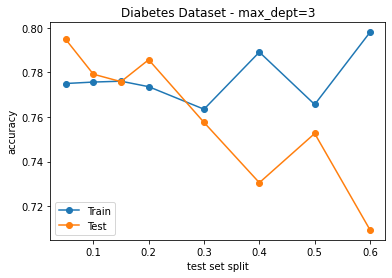

In [21]:
#decision tree classifer vs splits for max_depth
train_acc = []
test_acc = []
splits = [0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5, 0.6]
treenodes = []
treedepth = []
max = 3

for i in range(len(splits)):
   x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=splits[i], random_state=1)
   # Create Decision Tree classifer object
   model = DecisionTreeClassifier(criterion='gini', max_depth=max)

   # Train Decision Tree Classifer
   model = model.fit(x_train,y_train)
   #Predict the response for test dataset
   y_train_pred = model.predict(x_train)
   #Predict the response for test dataset
   y_test_pred = model.predict(x_test)

   train_acc.append(metrics.accuracy_score(y_train, y_train_pred))
   test_acc.append(metrics.accuracy_score(y_test, y_test_pred))
   treenodes.append(model.tree_.node_count)
   treedepth.append(model.tree_.max_depth)

   #print tree attributes
   print("Split:", splits[i], " Depth:",model.tree_.max_depth, " Nodes:",model.tree_.node_count, " Train set accuracy:", train_acc[i], " Test set Accuracy:",test_acc[i])

   #printConfusion matrix
   print("     Confusion Matrix:", list(confusion_matrix(y_test,y_test_pred)/len(y_test)))

#plot results
pyplot.plot(splits, train_acc , '-o', label='Train')
pyplot.plot(splits, test_acc, '-o', label='Test')
pyplot.title('Diabetes Dataset - max_dept='+str(max))
pyplot.ylabel('accuracy')
pyplot.xlabel('test set split')
pyplot.legend()
pyplot.show()

1 ) Depth: 1  Nodes: 3  Train set accuracy: 0.742671009771987  Test set Accuracy: 0.7077922077922078
     Confusion Matrix: [array([0.50649351, 0.13636364]), array([0.15584416, 0.2012987 ])]
2 ) Depth: 2  Nodes: 7  Train set accuracy: 0.7785016286644951  Test set Accuracy: 0.7467532467532467
     Confusion Matrix: [array([0.57142857, 0.07142857]), array([0.18181818, 0.17532468])]
3 ) Depth: 3  Nodes: 15  Train set accuracy: 0.7817589576547231  Test set Accuracy: 0.7402597402597403
     Confusion Matrix: [array([0.54545455, 0.0974026 ]), array([0.16233766, 0.19480519])]
4 ) Depth: 4  Nodes: 31  Train set accuracy: 0.8159609120521173  Test set Accuracy: 0.6948051948051948
     Confusion Matrix: [array([0.53896104, 0.1038961 ]), array([0.2012987 , 0.15584416])]
5 ) Depth: 5  Nodes: 55  Train set accuracy: 0.8583061889250815  Test set Accuracy: 0.7012987012987013
     Confusion Matrix: [array([0.53246753, 0.11038961]), array([0.18831169, 0.16883117])]
6 ) Depth: 6  Nodes: 89  Train set acc

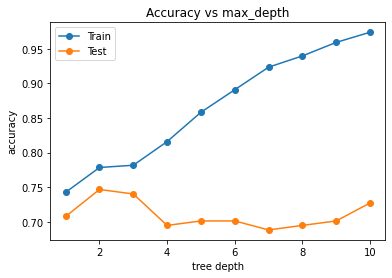

In [ ]:
#decision tree classifer with max_depth
train_acc = []
test_acc = []
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=33)
max_depth_set = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for i in max_depth_set:
   # Create Decision Tree classifer object
   model = DecisionTreeClassifier(criterion='gini', max_depth=i)

   # Train Decision Tree Classifer
   model = model.fit(x_train,y_train)
   if i==1:
      pick_model = model
   #Predict the response for test dataset
   y_train_pred = model.predict(x_train)
   #Predict the response for test dataset
   y_test_pred = model.predict(x_test)

   train_acc.append(metrics.accuracy_score(y_train, y_train_pred))
   test_acc.append(metrics.accuracy_score(y_test, y_test_pred))

   #print tree attributes
   print(i, ") Depth:",model.tree_.max_depth, " Nodes:",model.tree_.node_count, " Train set accuracy:",train_acc[i-1], " Test set Accuracy:",test_acc[i-1])

   #printConfusion matrix
   print("     Confusion Matrix:", list(confusion_matrix(y_test,y_test_pred)/len(y_test)))

#plot results vs tree depth
pyplot.plot(max_depth_set, train_acc , '-o', label='Train')
pyplot.plot(max_depth_set, test_acc, '-o', label='Test')
pyplot.title('Accuracy vs max_depth')
pyplot.ylabel('accuracy')
pyplot.xlabel('tree depth')
pyplot.legend()
pyplot.show()

0 0.0  Depth: 14  Nodes: 89  Train set accuracy: 0.9136807817589576  Test set Accuracy: 0.7857142857142857
     Confusion Matrix: [array([0.50649351, 0.07792208]), array([0.13636364, 0.27922078])]
1 0.001  Depth: 9  Nodes: 49  Train set accuracy: 0.8534201954397395  Test set Accuracy: 0.8181818181818182
     Confusion Matrix: [array([0.55194805, 0.03246753]), array([0.14935065, 0.26623377])]
2 0.002  Depth: 7  Nodes: 31  Train set accuracy: 0.8338762214983714  Test set Accuracy: 0.8116883116883117
     Confusion Matrix: [array([0.54545455, 0.03896104]), array([0.14935065, 0.26623377])]
3 0.003  Depth: 5  Nodes: 17  Train set accuracy: 0.8078175895765473  Test set Accuracy: 0.7792207792207793
     Confusion Matrix: [array([0.55844156, 0.02597403]), array([0.19480519, 0.22077922])]
4 0.004  Depth: 5  Nodes: 17  Train set accuracy: 0.8078175895765473  Test set Accuracy: 0.7792207792207793
     Confusion Matrix: [array([0.55844156, 0.02597403]), array([0.19480519, 0.22077922])]
5 0.005  De

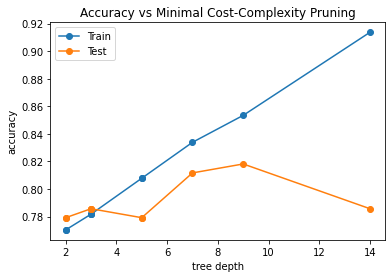

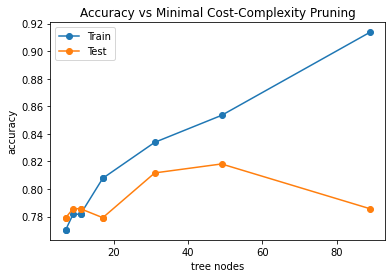

In [ ]:
#decision tree classifer with Minimal Cost-Complexity Pruning 

train_acc = []
test_acc = []
treenodes = []
treedepth = []
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=44)

for i in range(0,10):
   # Create Decision Tree classifer object
   model = DecisionTreeClassifier(criterion='gini', ccp_alpha=(i+3)/1000)

   # Train Decision Tree Classifer
   model = model.fit(x_train,y_train)
   #Predict the response for test dataset
   y_train_pred = model.predict(x_train)
   #Predict the response for test dataset
   y_test_pred = model.predict(x_test)

   train_acc.append(metrics.accuracy_score(y_train, y_train_pred))
   test_acc.append(metrics.accuracy_score(y_test, y_test_pred))
   treenodes.append(model.tree_.node_count)
   treedepth.append(model.tree_.max_depth)

   #print tree attributes
   print(i, i/1000, " Depth:",model.tree_.max_depth, " Nodes:",model.tree_.node_count, " Train set accuracy:",train_acc[i], " Test set Accuracy:",test_acc[i])

   #printConfusion matrix
   print("     Confusion Matrix:", list(confusion_matrix(y_test,y_test_pred)/len(y_test)))

#plot results vs tree depth
pyplot.plot(treedepth, train_acc , '-o', label='Train')
pyplot.plot(treedepth, test_acc, '-o', label='Test')
pyplot.title('Accuracy vs Minimal Cost-Complexity Pruning')
pyplot.ylabel('accuracy')
pyplot.xlabel('tree depth')
pyplot.legend()
pyplot.show()

#plot results vs number of nodes
pyplot.plot(treenodes, train_acc , '-o', label='Train')
pyplot.plot(treenodes, test_acc, '-o', label='Test')
pyplot.title('Accuracy vs Minimal Cost-Complexity Pruning')
pyplot.ylabel('accuracy')
pyplot.xlabel('tree nodes')
pyplot.legend()
pyplot.show()

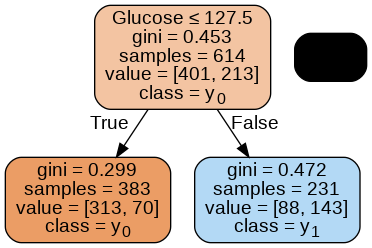

In [ ]:
#Option to show decision tree graphic
#Import modules for Visualizing Decision trees
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

#pick_model = 
features=x.columns
dot_data = StringIO()
export_graphviz(pick_model, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names = features, class_names=True )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes_set.png')
Image(graph.create_png())